## Aluno: Fernando Gomes Papi

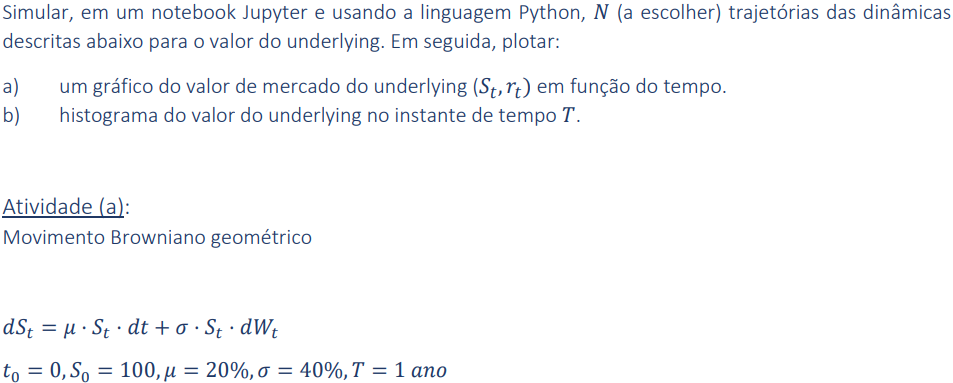

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def geometric_brownian_motion(mu, sigma, S0, T, dt):
    # Calculate the number of time steps based on the total time and time step
    num_steps = int(T / dt)
    
    # Generate random increments for the Wiener process
    dW = np.random.default_rng().normal(loc=0.0, scale=np.sqrt(dt), size=num_steps)
    
    # Create an array to store the asset price values
    S = np.zeros(num_steps + 1)
    S[0] = S0  # Set the initial asset price
    
    # Loop through each time step
    for i in range(num_steps):
        # Calculate the change in the asset price at the current step
        dS = mu * S[i] * dt + sigma * S[i] * dW[i]

        # Update the asset price for the next time step
        S[i + 1] = S[i] + dS

    return S

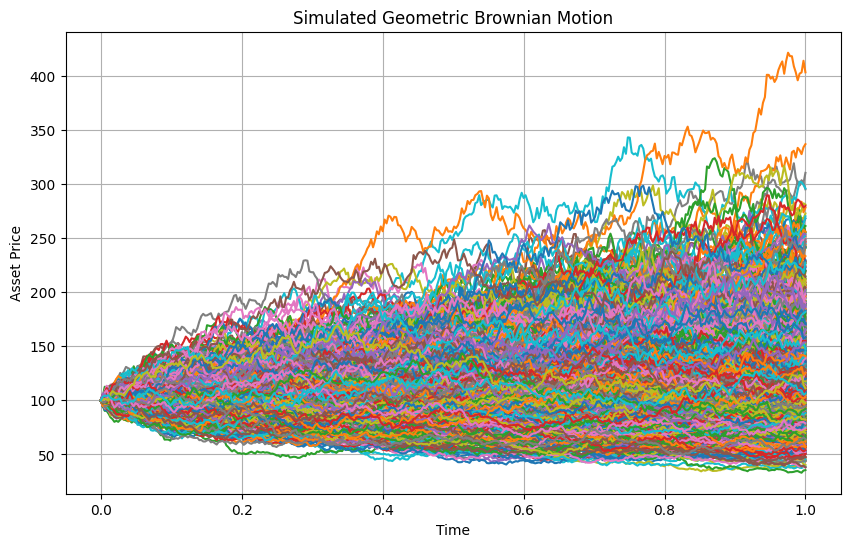

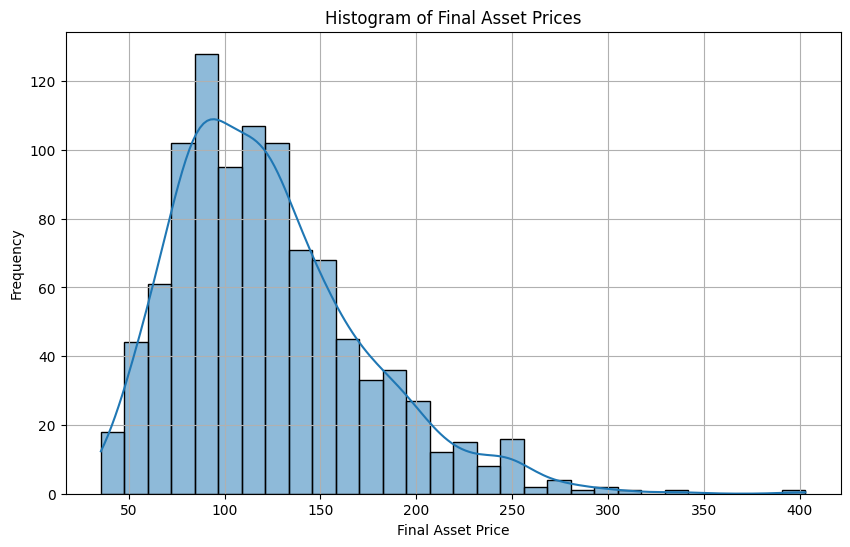

In [3]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

final_values = []
t = np.linspace(0, T,  int(T / dt) + 1)

plt.figure(figsize=(10, 6))

# Simulate Geometric Brownian Motion
for i in range(1000):
    S = geometric_brownian_motion(mu, sigma, S0, T, dt)
    final_values.append(S[-1])
    # Plot the simulated path
    sns.lineplot(x=t, y=S)

plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulated Geometric Brownian Motion')
plt.grid(True)
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_values, bins=30, kde=True)
plt.xlabel('Final Asset Price')
plt.ylabel('Frequency')
plt.title('Histogram of Final Asset Prices')
plt.grid(True)
plt.show()

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
## extra: Aleatory python package
from aleatory.processes import GBM

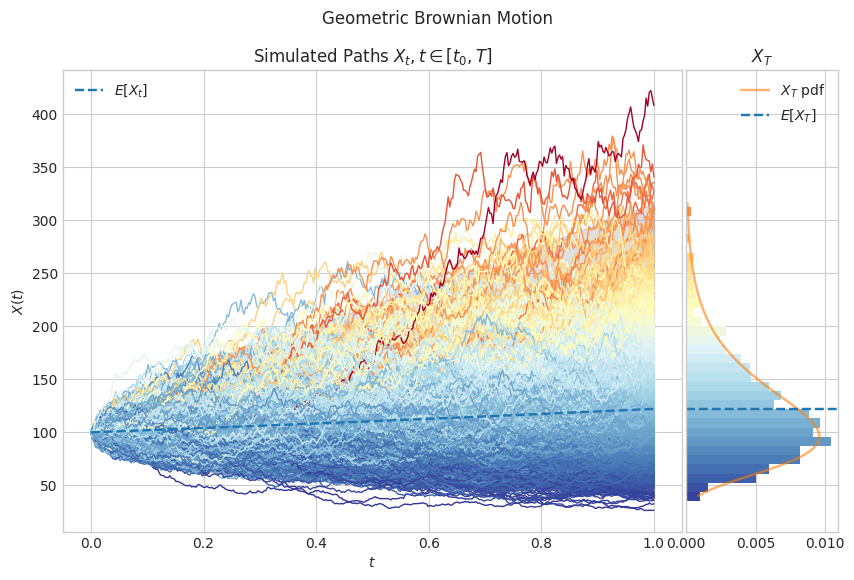

In [6]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)
fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=2000,**fig_kw)

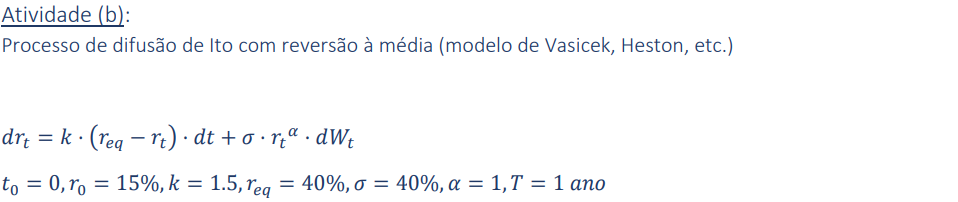

In [7]:
def ito_diffusion_process(k, req, sigma, alpha, r0, T, dt):
    # Calculate the number of time steps based on the total time and time step
    num_steps = int(T / dt)
    
    # Generate random increments for the Wiener process
    dW = np.random.default_rng().normal(loc=0.0, scale=np.sqrt(dt), size=num_steps)
    
    # Create an array to store the process values
    r = np.zeros(num_steps + 1)
    r[0] = r0  # Set the initial value
    
    # Loop through each time step
    for i in range(num_steps):
        # Calculate the change in the process at the current step
        dr = k * (req - r[i]) * dt + sigma * r[i]**alpha * dW[i]
        
        # Update the process value for the next time step
        r[i + 1] = r[i] + dr

    return r

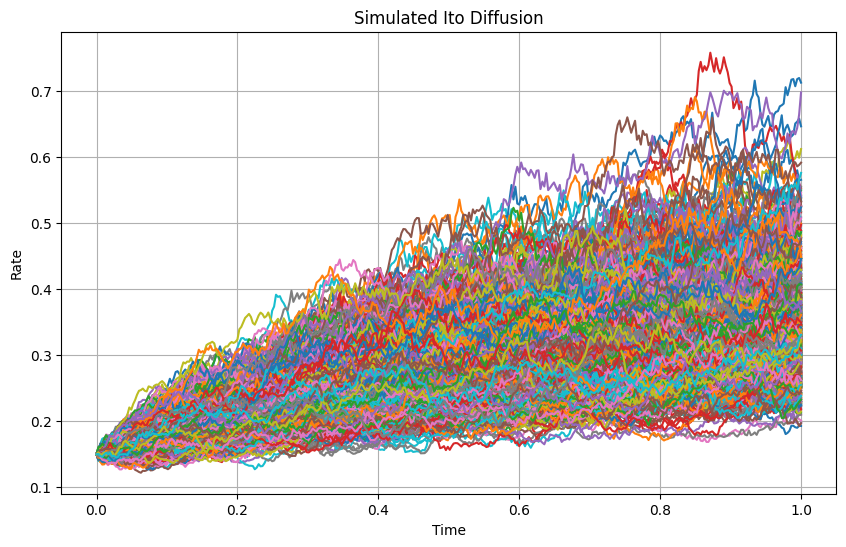

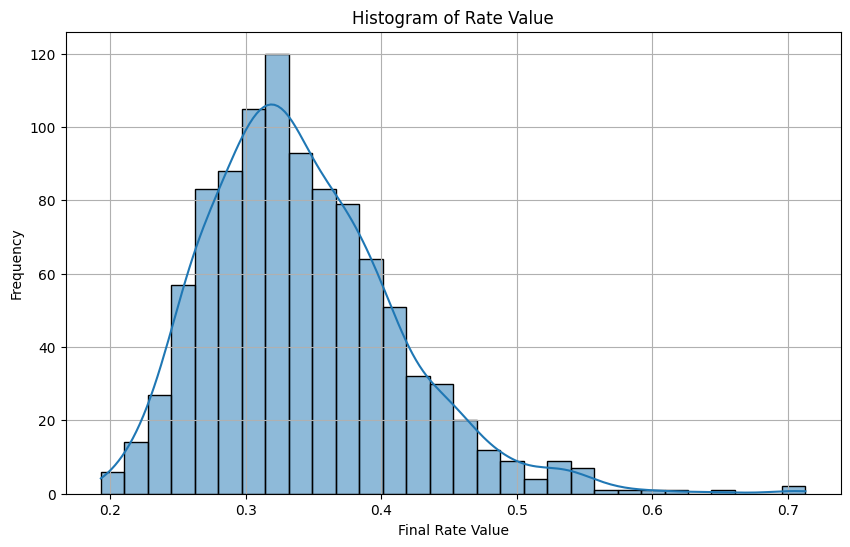

In [8]:
# Parameters
k = 1.5 # drift
r0 = 0.15 # initial rate 
req = 0.4 # reference rate
sigma = 0.4 # volatility
alpha = 1 # impact parameter 
T = 1 # Total time
dt = 1/365 # value of each step 

final_rates = []

# Simulate Ito Diffusion Process
plt.figure(figsize=(10, 6))
t = np.linspace(0, T,  int(T / dt) + 1)

for i in range(1000):
    # simulate the process
    r = ito_diffusion_process(k, req, sigma, alpha, r0, T, dt)
    # save the final rate to plot a histogram
    final_rates.append(r[-1])
    # Plot the simulated path
    sns.lineplot(x=t, y=r)

plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Simulated Ito Diffusion')
plt.grid(True)
plt.show()

# plot histrogram
plt.figure(figsize=(10, 6))
sns.histplot(final_rates, bins=30, kde=True)
plt.xlabel('Final Rate Value')
plt.ylabel('Frequency')
plt.title('Histogram of Rate Value')
plt.grid(True)
plt.show()

In [5]:
## extra: Aleatory python package
from aleatory.processes import Vasicek

Como $\alpha=1$, equivale ao processo de Vasicek. O próprio pacote define o processo como:
$$dX_t = \theta(\mu - X_t) dt + \sigma X_t dW_t, \ \ \ \ \forall t\in (0,T],$$

porém o implementa como 

$$dX_t = \theta(\mu - X_t) dt + \sigma dW_t, \ \ \ \ \forall t\in (0,T],$$

Eu arrumei o código do pacote manualmente para incluir $*X_t$ no termo aleatório

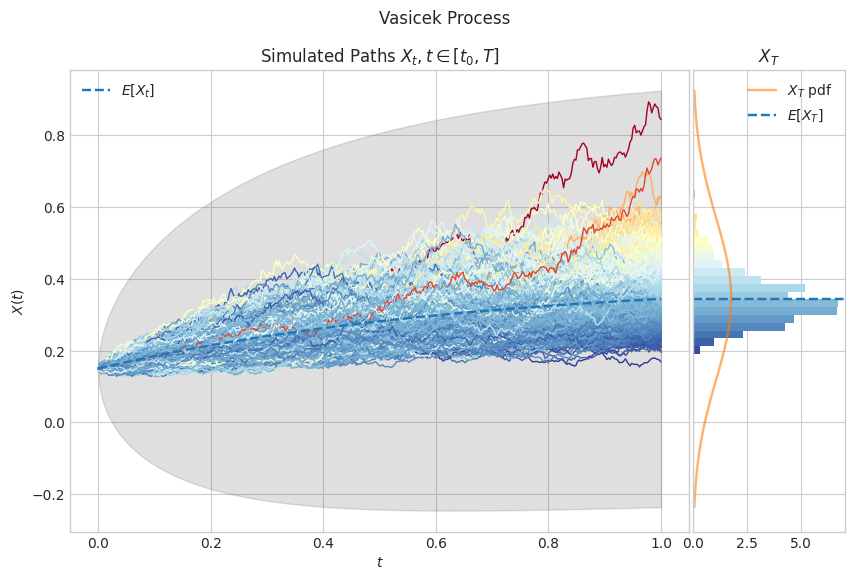

In [12]:
vas = Vasicek(theta=k, mu=req, sigma=sigma, initial=r0, T=T, rng=None)
fig_kw = {'figsize':(10,6)}
fig = vas.draw(envelope=True, n = 365, N=1000,**fig_kw)